<a href="https://colab.research.google.com/github/Impapro/Impa/blob/main/InmersionDatos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notas de Clase

In [5]:
#Cargamos el archivo de drive y la librería pandas

from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Notemos que existe la columna Valor donde tenemos un string

type(inmuebles.Valor[0])

str

In [ ]:
#Separar los string

inmuebles.Valor[0].split()

['$', '360.000.000']

In [ ]:
#Mostrar el dataframe de la columna valor separado

inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [6]:
#Creamos nuevas columnas para tener los valores de la columna

valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]  #Nueva columna Moneda (representa el caracter $)
inmuebles['Precio'] = valor[1]  #Nueva columna Precio (representa la cantidad neta en el valor de moneda)

inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio
5286,Apartamento,Apartamento en venta en Bosa,3,1,42,Bosa,Bosa Central,$ 131.000.000,$,131.000.000
6635,Apartamento,Apartamento en venta en Usaquén,3,5,203,Usaquén,Usaquén,$ 2.000.000.000,$,2.000.000.000
3021,Casa,Casa en venta en Tunjuelito,5,3,210,Tunjuelito,Tunjuelito,$ 540.000.000,$,540.000.000


In [ ]:
type(inmuebles.Precio[0])

str

In [9]:
#La columna Precio sigue siendo string, no es aún un número float o int. Haremos ese cambio

inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

#Este cambio elimina el punto de miles para dejar un número normal, pero sigue siendo un str

In [3]:
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
4921,Casa,Casa en venta en Suba,7,4,330,Suba,Suba,$ 700.000.000
6344,Apartamento,Apartamento en venta en Casablanca,3,1,50,Casablanca,Casa Blanca Suba,$ 155.000.000
4836,Apartamento,Apartamento en venta en Usaquén,4,6,307,Usaquén,Usaquén,$ 1.500.000.000


In [8]:
type(inmuebles.Precio[0])

str

In [10]:
#Crearemos una nueva columna que no solo cambie a número float, sino que también reducirá el número de ceros

inmuebles['Precio_Millón'] = inmuebles.Precio.astype('float') / 1000000

In [13]:
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millón
6885,Apartamento,Apartamento en venta en Suba,3,2,51,Suba,Suba,$ 167.000.000,$,167000000,167.0
2380,Apartamento,Apartamento en venta en Cedritos,3,2,74,Cedritos,Usaquén,$ 340.000.000,$,340000000,340.0
655,Apartamento,Apartamento en venta en Cedritos,4,4,100,Cedritos,Usaquén,$ 426.000.000,$,426000000,426.0


In [ ]:
type(inmuebles.Precio_Millón[0])

numpy.float64

In [14]:
#Mostrando solo el precio como float y el barrio

inmuebles[['Precio_Millón','Barrio']]

,Precio_Millón,Barrio
0,360.00,Zona Noroccidental
1,670.00,Castilla
2,1120.00,Chico Reservado
3,890.00,Usaquén
4,970.00,Bella Suiza
...,...,...
9515,290.00,Kennedy
9516,670.00,Parque Central Bavaria
9517,900.00,Restrepo
9518,335.00,Engativa


In [17]:
#Describir la tabla con pocos números

pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millón
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [18]:
#Analizando los datos más relevantes, de aquí se obtiene a través de la crítica una conclusión pertinente

inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millón
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [20]:
inmuebles.loc[inmuebles.Área == 2]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millón
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


In [21]:
inmuebles.loc[inmuebles.Baños == 0]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millón
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,$,9200000000,9200.00
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,$,1000000000,1000.00
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,$,800000000,800.00


<Axes: ylabel='Frequency'>

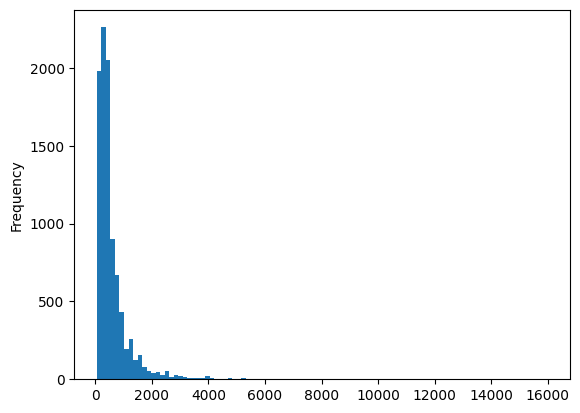

In [24]:
#Histograma precio de inmuebles por millón de precio
#Un histograma nos da la frecuencia de una variable. En este caso, nos muestra la frecuencia de casas (y) según el precio (x)
#El gráfico con Pandas no es muy bueno para realizar análisis visual

inmuebles['Precio_Millón'].plot.hist(bins=100)

<function matplotlib.pyplot.show(close=None, block=None)>

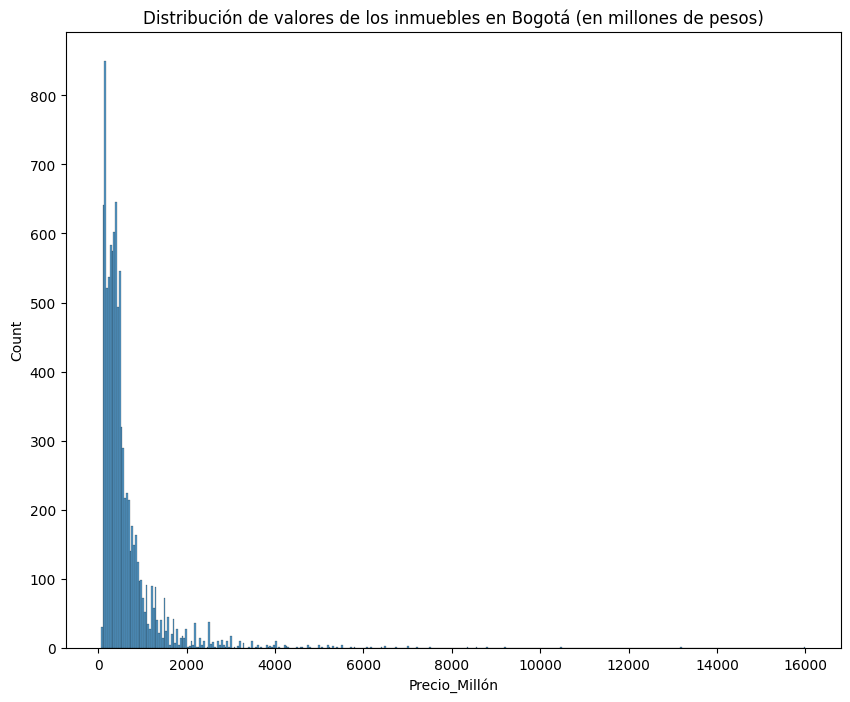

In [27]:
#Librerias para trabajar la visualización

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millón')
grafica.set_title('Distribución de valores de los inmuebles en Bogotá (en millones de pesos)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

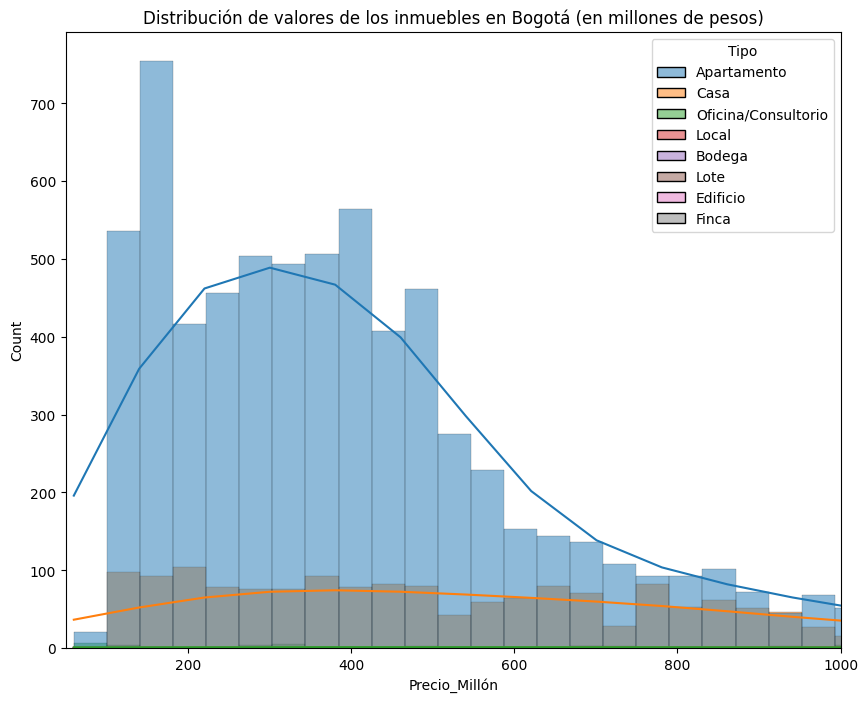

In [33]:
#Grafica separada a detalle y guardado

plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millón', kde=True, hue='Tipo')
grafica.set_title('Distribución de valores de los inmuebles en Bogotá (en millones de pesos)')
plt.xlim(50,1000) #limite maximo de x, que es el precio en millones de pesos
plt.savefig('/content/drive/MyDrive/valorinmuebles50_1000.png',format='png') #guardado del gráfico en una ruta determinada
plt.show

## Desafío

In [86]:
#Crearemos un histograma seleccionando los inmuebles menos ofertados

inmuebles.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

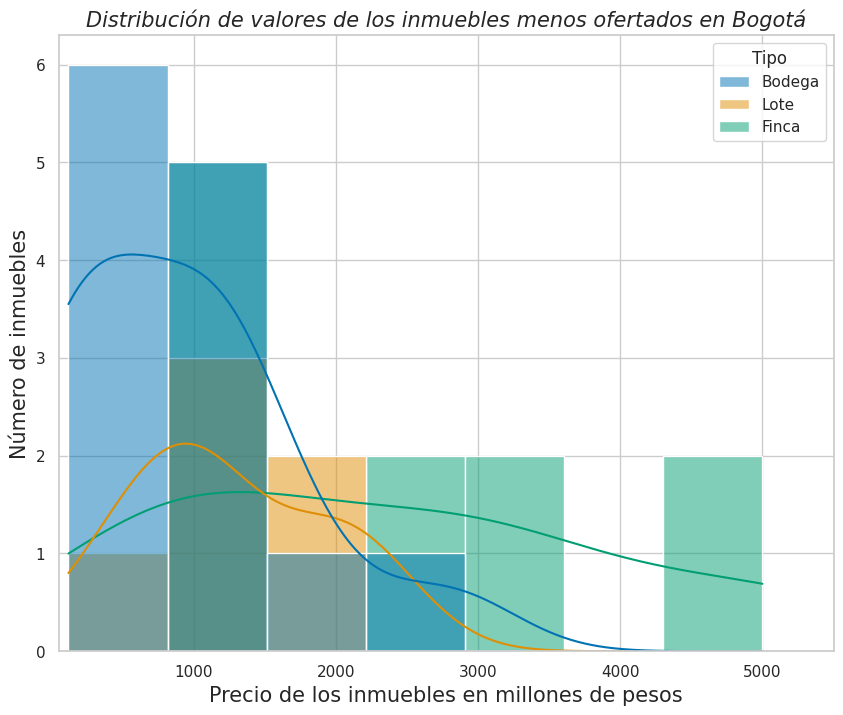

In [123]:
from matplotlib.text import FontProperties
#Tomando los inmuebles Lote, Finca y Bodega, hacemos el histograma

plt.figure(figsize=(10,8))
sns.set_theme(palette='colorblind',style='whitegrid')
grafica = sns.histplot(data=inmuebles.loc[inmuebles['Tipo'].isin(['Bodega','Finca','Lote'])], x='Precio_Millón', kde=True, hue='Tipo', fill=True)
grafica.set_title('Distribución de valores de los inmuebles menos ofertados en Bogotá', style='oblique', size=15)
grafica.set_xlabel('Precio de los inmuebles en millones de pesos', size=15)
grafica.set_ylabel('Número de inmuebles', size =15)
plt.xlim(50,5500)
plt.show

**Conclusiones**

1. La mayoría de las bodegas cuestan menos de 1000 millones de pesos.
2. Se pueden encontrar bodegas, lotes y fincas con proceios entre los 1000 y 2000 millones de pesos.
3. Ninguno de los inmuebles supera los 5000 millones de pesos.
4. La mayoría de las fincas y lotes cuestan entre 1000 y 2000 millones de pesos.
5. Ningún inmueble cuesta 4000 millones de pesos o valores cercanos.

In [124]:
#Escribimos el precio del m2 por barrio

inmuebles[['Precio_Millón','Barrio','Área']]

#Nos resta realizar un promedio de estos valores

,Precio_Millón,Barrio,Área
0,360.00,Zona Noroccidental,70
1,670.00,Castilla,170
2,1120.00,Chico Reservado,144
3,890.00,Usaquén,154
4,970.00,Bella Suiza,128
...,...,...,...
9515,290.00,Kennedy,70
9516,670.00,Parque Central Bavaria,100
9517,900.00,Restrepo,383
9518,335.00,Engativa,183


In [210]:
#Promedio de precio en millones de pesos para los barrios según su área promedio

promedio_inmueblesAPM = inmuebles.groupby('Barrio')[['Área','Precio_Millón']].mean().sort_values(by=['Área','Precio_Millón'])
promedio_inmueblesAPM

,Área,Precio_Millón
Barrio,,
Modelia,4316.75,705.47
Libertador,642.00,1020.00
Bosa Piamonte,400.00,470.00
La Soledad,378.62,1093.62
Restrepo,336.50,984.00
...,...,...
La Merced,41.00,359.50
El Tunal,41.00,160.00
San Diego,40.67,247.33


In [214]:
#Con esta información, creamos una nueva columna que tenga el valor por m2 de cada barrio

promedio_inmueblesAPM['Costo_Área_Promedio'] = promedio_inmueblesAPM['Precio_Millón'] / promedio_inmueblesAPM['Área']
promedio_inmueblesAPM = promedio_inmueblesAPM.sort_values(by=['Costo_Área_Promedio'], ascending=False)
promedio_inmueblesAPM

,Área,Precio_Millón,Costo_Área_Promedio
Barrio,,,
Santa Ana,309.38,3172.50,10.25
El Virrey,93.83,931.67,9.93
La Candelaria,173.72,1544.23,8.89
La Merced,41.00,359.50,8.77
El Castillo,134.25,1137.50,8.47
...,...,...,...
Las Ferias,320.00,550.00,1.72
Libertador,642.00,1020.00,1.59
Roma,260.00,350.00,1.35


<function matplotlib.pyplot.show(close=None, block=None)>

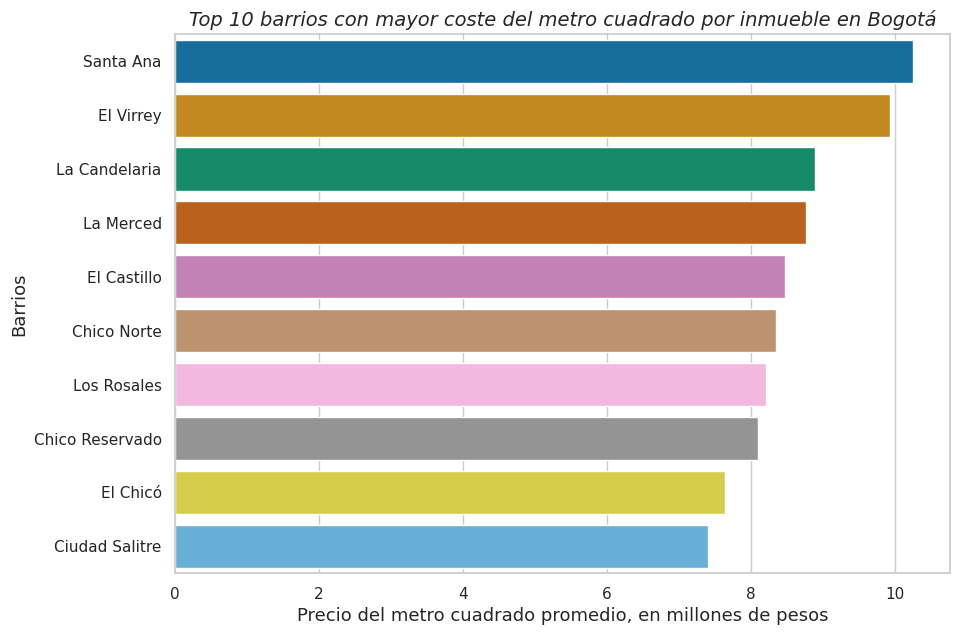

In [224]:
#Realizamos un diagrama de barras del costo por m2 de los inmuebles
#Como existe una cantidad grande de datos, se grafica el Top10 datos para mejor visualización. Esto sirve como ejemplo

plt.figure(figsize=(10,7))
sns.set_theme(palette='colorblind',style='whitegrid')
grafica = sns.barplot(data=promedio_inmueblesAPM.head(10), x='Costo_Área_Promedio', y=promedio_inmueblesAPM.head(10).index)
grafica.set_title('Top 10 barrios con mayor coste del metro cuadrado por inmueble en Bogotá', style='oblique', size=14)
grafica.set_xlabel('Precio del metro cuadrado promedio, en millones de pesos', size=13)
grafica.set_ylabel('Barrios', size =13)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

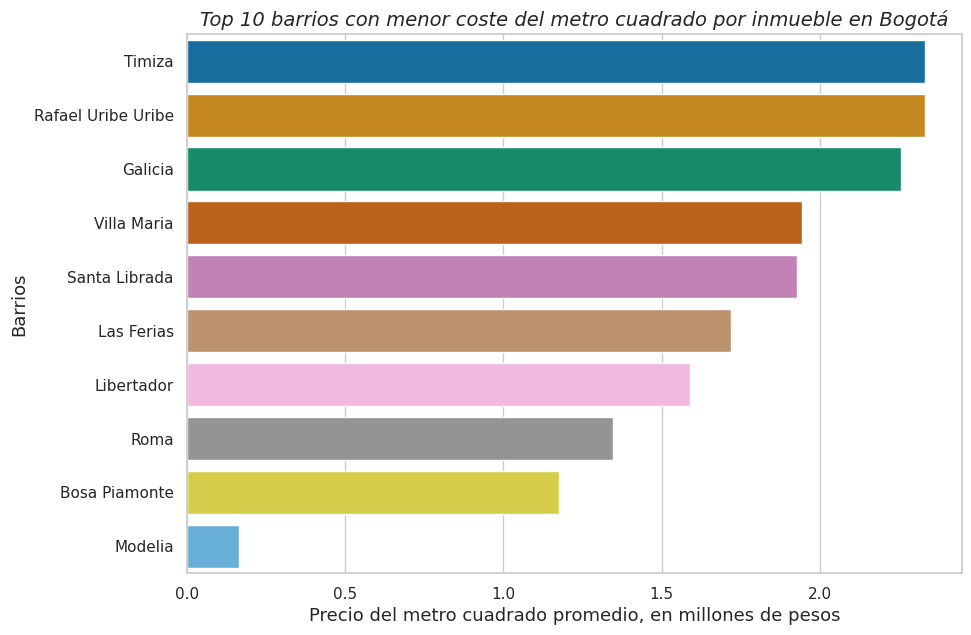

In [225]:
#Para dar una conclusión mejor, también se grafica el top10 de los barrios con menor coste por área cuadrada

plt.figure(figsize=(10,7))
sns.set_theme(palette='colorblind',style='whitegrid')
grafica = sns.barplot(data=promedio_inmueblesAPM.tail(10), x='Costo_Área_Promedio', y=promedio_inmueblesAPM.tail(10).index)
grafica.set_title('Top 10 barrios con menor coste del metro cuadrado por inmueble en Bogotá', style='oblique', size=14)
grafica.set_xlabel('Precio del metro cuadrado promedio, en millones de pesos', size=13)
grafica.set_ylabel('Barrios', size =13)
plt.show

**Conclusiones**

1. Santa Ana y Virrey son los barrios cuyos inmuebles cuestan más por metro cuadrado, en promedio.
2. Podemos notar una ligera curva de cambio entre cada barrio excepto para Modelia, quien tiene un cambio abrupto en sus datos. Esto sugiere que los datos recolectados de este barrio pueden estar mal tipeados.
3. Excluyendo el caso excepcional de Modelia, Roma y Bosa Piamonte son los barrios cuyos inmuebles cuestan menos por metro cuadrado, en promedio.